# Decision tree
회귀, 분류, 다중출력

In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:]
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2)

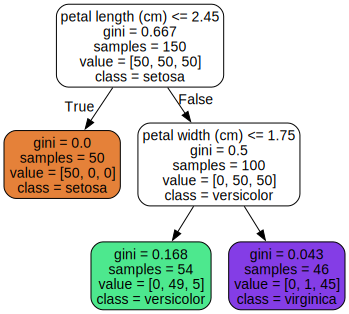

In [5]:
from graphviz import Source
from sklearn.tree import export_graphviz
import os

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)


export_graphviz(
        tree_clf,
        out_file=os.path.join(IMAGES_PATH, "iris_tree.dot"),
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

Source.from_file(os.path.join(IMAGES_PATH, "iris_tree.dot"))

### 클래스 확률 추정
어떤 샘플이 클래스 k에 속할 확률을 구할 수 있다. 
k가 있는 리프노드로 간 후, 클래스에 속할 확률을 구한다. 

In [11]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [10]:
tree_clf.predict([[5, 1.5]])


array([1])

### CART 알고리즘
본격적으로 트리를 만든다. attribute k, threshold tk를 가장 순수한 서브셋이 되도록 하는 것을 찾는다. 

이후 계속해서 반복한다. 
최대 깊이가 되면 중지하거나 불순도를 줄이는 분할을 찾을 수 없을 때 멈춘다. 

구현은 Greedy 알고리즘으로 되어 있다. 

### 계산 복잡도
O(log(m))개의 노드를 거쳐야 한다. 
각 노드는 하나의 특성값만 확인하기 때문에 전체 복잡도는 특성 (m은 샘플수)

리프에 모든 특성이 있다면 최대 노드는 m개

전체 복잡도는 특성 수와 무관하게 O(log(m)) 이다. 

특성수와 관련이 없는 이유 : 한 특성을 여러 개로 세분화하여 나눌 수 있기 때문에

각 노드에서 모든 샘플의 모든 특성을 비교하면 훈련 복잡도는 O(n*m*log(m))이다.


### 엔트로피
엔트로피가 0일 때 지니 불순도가 순수하다. 


### 규제 매개변수
결정트리 : 비파라미터 모델
선형회귀 : 파라미터 모델

결정트리는 비파라미터 모델이기 때문에 훈련 전 파라미터수가 결정되지 않는다. 
모델구조가 데이터에 맞춰지기에 자유로우나 과대적합이 될 수 있다. 

반대로 파라미터 모델은 자유도가 제한되고 과대적합될 가능성이 쉽다.

